## Sign language translation
#### ANN Network
#### Author : Gyan Krishna

In [9]:
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils, plot_model, to_categorical
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

from numpy import argmax
import pydot
import os

## Loading the data set

In [23]:
model_images_path = os.path.join(os.getcwd(),r'model_images')
accuracy_plots_path =os.path.join(os.getcwd(), r'accuracy_plots')

npx_path = os.path.join(os.getcwd(), r"npx_dataset")
x_data = np.load(os.path.join(npx_path, "x_data.npy"))
y_data = np.load(os.path.join(npx_path, "y_data.npy"))

print(x_data.shape)
print(y_data.shape)

(87000, 100, 100)
(87000,)


## Splitting the data set 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.15)


print("x train shape      : ", x_train.shape)
print("y train shape      : ", y_train.shape)
print("\nx validation shape : ", x_valid.shape)
print("y validation shape : ", y_valid.shape)
print("\nx test shape       : ", x_test.shape)
print("y test shape       : ", y_test.shape)

x train shape      :  (62857, 100, 100)
y train shape      :  (62857,)

x validation shape :  (11093, 100, 100)
y validation shape :  (11093,)

x test shape       :  (13050, 100, 100)
y test shape       :  (13050,)


## Normalizing the data set


In [32]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')

x_train /= 255
x_test /= 255
x_valid /= 255

## Converting y_test and y_train to categorical data

In [33]:
n_category = 29
y_train = np_utils.to_categorical(y_train, n_category)
y_test  = np_utils.to_categorical(y_test,  n_category)
y_valid = np_utils.to_categorical(y_valid,  n_category)

## Creating the base line model

In [14]:
def baseline_model():
    model = Sequential()
    model.add(Flatten(input_shape = (100, 100)))
    model.add(Dense(650, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(350, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(29))
    model.add(Activation('softmax'))

    model.summary()
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 650)               6500650   
_________________________________________________________________
dropout_4 (Dropout)          (None, 650)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 350)               227850    
_________________________________________________________________
dropout_5 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 29)                10179     
_________________________________________________________________
activation_2 (Activation)    (None, 29)               

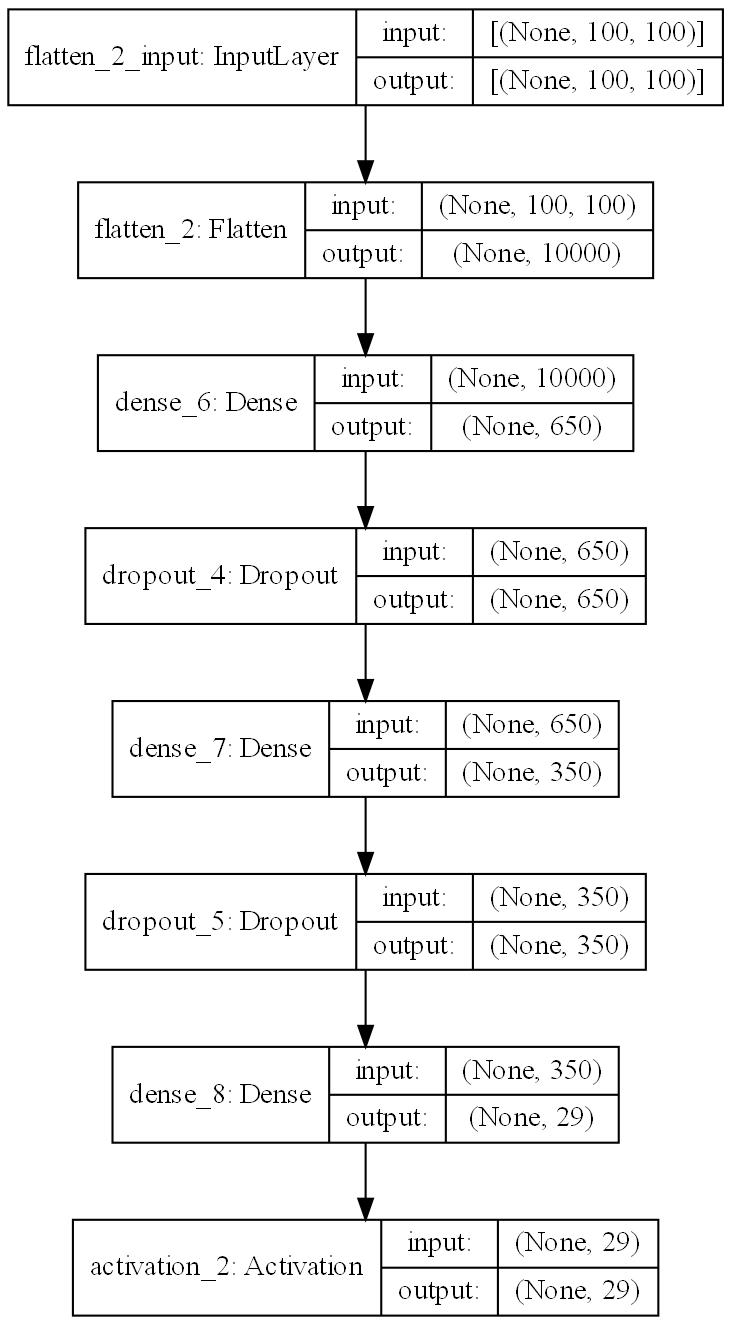

In [41]:
model = baseline_model()
plot_model(model,
          to_file = os.path.join(accuracy_plots_path, "ann_baseline.jpg"),
          show_shapes = True,
          show_layer_names = True,
          rankdir = "TB",
          expand_nested = False,
          dpi = 150)

In [42]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['categorical_accuracy'])

In [43]:
epochs = 100
model_log = model.fit(x_train, y_train, 
                      batch_size = 256, 
                      epochs = 100, 
                      verbose = 1,
                      validation_data = (x_valid, y_valid))

Epoch 1/100
246/246 [==============================] - 21s 84ms/step - loss: 3.7018 - categorical_accuracy: 0.0766 - val_loss: 2.5187 - val_categorical_accuracy: 0.2212
Epoch 2/100
246/246 [==============================] - 21s 85ms/step - loss: 2.5403 - categorical_accuracy: 0.2100 - val_loss: 2.0338 - val_categorical_accuracy: 0.3675
Epoch 3/100
246/246 [==============================] - 22s 90ms/step - loss: 2.2557 - categorical_accuracy: 0.2757 - val_loss: 1.8023 - val_categorical_accuracy: 0.4289
Epoch 4/100
246/246 [==============================] - 21s 87ms/step - loss: 2.0761 - categorical_accuracy: 0.3216 - val_loss: 1.6570 - val_categorical_accuracy: 0.4913
Epoch 5/100
246/246 [==============================] - 21s 83ms/step - loss: 1.9460 - categorical_accuracy: 0.3561 - val_loss: 1.4955 - val_categorical_accuracy: 0.5308
Epoch 6/100
246/246 [==============================] - 20s 82ms/step - loss: 1.8500 - categorical_accuracy: 0.3803 - val_loss: 1.5951 - val_categorical_acc

246/246 [==============================] - 22s 88ms/step - loss: 1.0261 - categorical_accuracy: 0.6375 - val_loss: 0.7183 - val_categorical_accuracy: 0.7599
Epoch 50/100
246/246 [==============================] - 22s 88ms/step - loss: 1.0455 - categorical_accuracy: 0.6327 - val_loss: 0.8499 - val_categorical_accuracy: 0.6948
Epoch 51/100
246/246 [==============================] - 22s 88ms/step - loss: 1.0551 - categorical_accuracy: 0.6310 - val_loss: 0.7597 - val_categorical_accuracy: 0.7289
Epoch 52/100
246/246 [==============================] - 22s 88ms/step - loss: 1.0371 - categorical_accuracy: 0.6333 - val_loss: 0.7296 - val_categorical_accuracy: 0.7558
Epoch 53/100
246/246 [==============================] - 22s 88ms/step - loss: 0.9947 - categorical_accuracy: 0.6500 - val_loss: 0.7232 - val_categorical_accuracy: 0.7534
Epoch 54/100
246/246 [==============================] - 22s 88ms/step - loss: 0.9955 - categorical_accuracy: 0.6505 - val_loss: 0.7652 - val_categorical_accuracy: 

246/246 [==============================] - 22s 88ms/step - loss: 0.9020 - categorical_accuracy: 0.6834 - val_loss: 0.8076 - val_categorical_accuracy: 0.7151
Epoch 98/100
246/246 [==============================] - 21s 87ms/step - loss: 0.8529 - categorical_accuracy: 0.7009 - val_loss: 0.8091 - val_categorical_accuracy: 0.6920
Epoch 99/100
246/246 [==============================] - 22s 88ms/step - loss: 0.8827 - categorical_accuracy: 0.6892 - val_loss: 0.7038 - val_categorical_accuracy: 0.7272
Epoch 100/100
246/246 [==============================] - 22s 88ms/step - loss: 0.8463 - categorical_accuracy: 0.7006 - val_loss: 0.8782 - val_categorical_accuracy: 0.6712


In [34]:
def evaluate_model(model, model_log, model_name):
    #print(model_log.history['loss'])
    print("train loss = ", model_log.history['loss'][-1])
    print("train accuracy = ", model_log.history['accuracy'][-1])
          
    print("test loss = ", model_log.history['val_loss'][-1])
    print("test accuracy = ", model_log.history['val_accuracy'][-1])

    plt.subplot(2,1,1)
    plt.title(model_name+' accuracy')
    plt.plot(range(1, epochs+1), model_log.history['accuracy'])
    plt.plot(range(1,  epochs+1), model_log.history['val_accuracy'])
    
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    
    plt.subplot(2,1,2)
    plt.title(model_name+' loss')
    plt.plot(model_log.history['loss'])
    plt.plot(model_log.history['val_loss'])
    
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'test'], loc='lower right')
    
    plt.tight_layout()
    
    plt.savefig(os.path.join(model_images_path, model_name+"model.jpg"))
    return

train loss =  1.1368173360824585
train accuracy =  0.6046581864356995
test loss =  1.2685316801071167
test accuracy =  0.5833408236503601


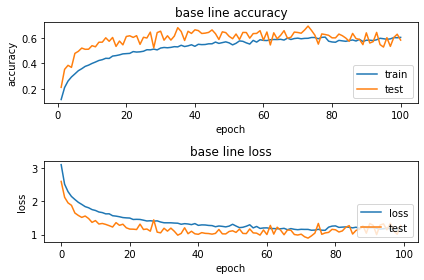

In [35]:
evaluate_model(model, model_log, "base line")

# Running testing data

In [39]:
results = model.evaluate(x_test, y_test, batch_size = 256)
print("\n\n test loss, test accuracy = ",results)

51/51 [==============================] - 2s 32ms/step - loss: 1.2499 - accuracy: 0.5835


 test loss, test accuracy =  [1.249876618385315, 0.5835248827934265]
